In [1]:
%load_ext autoreload
%autoreload 2

# Testing CTRNNCell
The `CTRNNCell` in the `modularRNN` package is the backbone of this repo. The cell can be expressed as the following equations:\
$$y_t=(1-\alpha)y_{t-1}+\alpha[W_{\text{rec}}y_{t-1}+W_{\text{in}}+\sqrt{\frac{2}{\alpha}}\sigma_{\text{rec}}\xi_t]_+$$
$$z_t=W_{\text{out}}y_t$$
Here, $\xi_t \sim \mathcal{N}(0,1)$ is a random variable sampled from the standard normal distribution.

In this notebook, we test the capabilities of the our developed `CTRNNCell`.

## Imports

In [2]:
import jax
import jax.numpy as jnp
from jax import random
from flax import linen as nn
from modularRNN.model import CTRNNCell

import matplotlib.pyplot as plt

## Test usage

In [3]:
features = 100
alpha = jnp.float32(0.1)
noise = jnp.float32(0.15)
out_shape = 2

key = random.PRNGKey(0)
x = jnp.ones((10, 50, 100)) # (batch, time, features)
x.shape

(10, 50, 100)

In [4]:
ctrnn = nn.RNN(CTRNNCell(features=features, alpha=alpha, noise=noise, out_shape=out_shape,))
key, subkey = random.split(key)
variables = ctrnn.init(subkey, x,)
variables

{'params': {'cell': {'h': {'kernel': Array([[-0.15945733,  0.1092213 , -0.2157075 , ...,  0.009113  ,
            -0.12524764, -0.06856684],
           [-0.02553245,  0.06213522,  0.00284054, ...,  0.02433918,
             0.05072815,  0.00768135],
           [ 0.04936995,  0.04436754,  0.1399824 , ...,  0.02374901,
            -0.16095938, -0.08813407],
           ...,
           [ 0.11143029, -0.08751105, -0.02211726, ...,  0.05284986,
            -0.27354783,  0.0184258 ],
           [-0.03558427,  0.02422536,  0.05407446, ..., -0.00787362,
            -0.06415009, -0.11941464],
           [-0.08853506, -0.14688799,  0.04972913, ..., -0.20163555,
             0.07790899, -0.03214083]], dtype=float32)},
   'i': {'kernel': Array([[-0.06989793,  0.0795096 , -0.17408983, ..., -0.0374601 ,
            -0.07241197,  0.13219985],
           [ 0.00071095, -0.0413617 , -0.02492376, ...,  0.00827265,
             0.20965417, -0.04525919],
           [-0.02761694, -0.21257244, -0.00348943, ...

In [5]:
key, subkey = random.split(key)
z_0, rates_0 = ctrnn.apply(variables, x, init_key=subkey,)
print(f"Output shape: {z_0.shape}")
print(f"Rates shape: {rates_0.shape}")

Output shape: (10, 50, 2)
Rates shape: (10, 50, 100)


In [6]:
key, subkey = random.split(key)
z_1, rates_1 = ctrnn.apply(variables, x, init_key=subkey,)

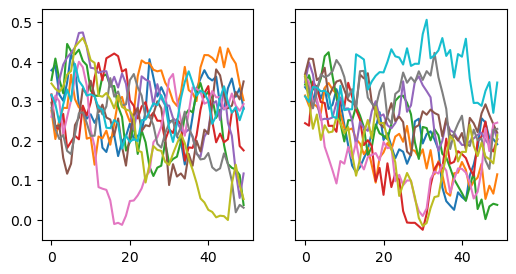

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

axs[0].plot(z_0[:,:,0].T)
axs[1].plot(z_1[:,:,0].T)

plt.show()

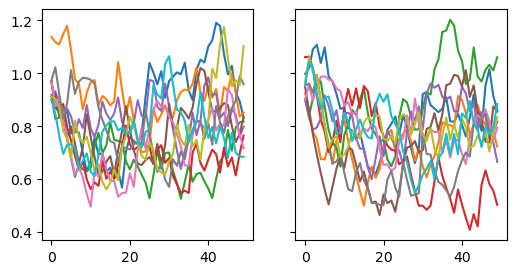

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

axs[0].plot(rates_0[:,:,0].T)
axs[1].plot(rates_1[:,:,0].T)

plt.show()